In [31]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [32]:
df = pd.read_csv('./Lifespan_Study_selected_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919 entries, 0 to 1918
Columns: 233 entries, Sample to WGS_Fragment_length_SD
dtypes: float64(209), int64(4), object(20)
memory usage: 3.4+ MB


In [33]:
column_name = df.columns.to_list()

In [34]:
print(column_name)

['Sample', 'Cell_line_group', 'Unique_variable_name', 'Cell_line', 'Cell_line_inhouse', 'Cell_type', 'Sex', 'Clinical_condition', 'Donor_age', 'Study_part', 'Replicate_line', 'Treatments', 'Treatment_description', 'Percent_oxygen', 'Date_time_of_passage', 'Date_of_Passage', 'Time_of_Passage', 'Notes', 'pre_designated_time_point_Udays', 'Passage', 'pre_study_passages_Udivisions', 'Days_grown_Udays', 'Days_Grown_with_prestudy_days_Grown_Udays', 'Days_after_treatment_Udays', 'Days_per_passage_Udays', 'Cells_plated_UmillionCells', 'Cells_counted_UmillionCells', 'Live_cells_counted_UmillionCells', 'Divisions_per_passage_Udoublings', 'Population_doublings_Utotal_divisions', 'Population_doubling_time_Uhours_per_division', 'Doubling_rate_Udays_per_division', 'Cell_diameter_Umicrometer', 'Cell_volume_Ucubed_micrometers', 'Percent_dead_cells', 'Telomere_length_Uts_ratio', 'Telomere_length_CV_Uts_ratio', 'IL6_ELISA_Upg_per_ml', 'IL6_normalized_ELISA_Uug_per_ml_per_1millionCells', 'GDF15_ELISA_Upg

In [35]:
# Show the first few rows of the dataset
df.head()


,Sample,Cell_line_group,Unique_variable_name,Cell_line,Cell_line_inhouse,Cell_type,Sex,Clinical_condition,Donor_age,Study_part,...,WGS_Percent_Coverage_at_1X,WGS_Percent_Coverage_at_10X,WGS_Percent_Coverage_at_15X,WGS_Percent_callability,WGS_Percent_autosome_callability,WGS_Percent_autosome_exon_callability,WGS_Fragment_length_median,WGS_Fragment_length_min,WGS_Fragment_length_max,WGS_Fragment_length_SD
0,1,HC5_sp1_Normal_Control_ox21,HC5_sp1_Normal_Control_ox21_p3,HC5,hFB1,Primary Human Fibroblast (forearm),male,Normal,29.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,HC5_sp1_Normal_Control_ox21,HC5_sp1_Normal_Control_ox21_p4,HC5,hFB1,Primary Human Fibroblast (forearm),male,Normal,29.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,HC5_sp1_Normal_Control_ox21,HC5_sp1_Normal_Control_ox21_p5,HC5,hFB1,Primary Human Fibroblast (forearm),male,Normal,29.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,HC5_sp1_Normal_Control_ox21,HC5_sp1_Normal_Control_ox21_p6,HC5,hFB1,Primary Human Fibroblast (forearm),male,Normal,29.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,HC5_sp1_Normal_Control_ox21,HC5_sp1_Normal_Control_ox21_p7,HC5,hFB1,Primary Human Fibroblast (forearm),male,Normal,29.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Check for telomere-related columns
telomere_columns = [col for col in df.columns if 'telomere' in col.lower()]
print("\
Telomere-related columns:")
print(telomere_columns)

Telomere-related columns:
['Telomere_length_Uts_ratio', 'Telomere_length_CV_Uts_ratio']


### Summary statistics for telomere length and age:

In [37]:
print(df[['Telomere_length_Uts_ratio', 'Donor_age']].describe())

       Telomere_length_Uts_ratio    Donor_age
count                 496.000000  1901.000000
mean                    0.986835    16.016307
std                     0.371104     9.977250
min                     0.290000     0.000000
25%                     0.710000    10.000000
50%                     0.940000    18.000000
75%                     1.210000    18.000000
max                     2.750000    36.000000


* check for missing values

In [38]:
print(df[['Telomere_length_Uts_ratio', 'Donor_age', 'Sex', 'Cell_type', 'Clinical_condition']].isnull().sum())

Telomere_length_Uts_ratio    1423
Donor_age                      18
Sex                             0
Cell_type                      18
Clinical_condition              0
dtype: int64


##### Clean the data

In [39]:
# Drop rows with missing telomere length or age data
df_clean = df.dropna(subset=['Telomere_length_Uts_ratio', 'Donor_age'])

# Verify the cleaning process
print("Data after cleaning:")
print(df_clean[['Telomere_length_Uts_ratio', 'Donor_age']].isnull().sum())
print(df_clean[['Telomere_length_Uts_ratio', 'Donor_age']].describe())


Data after cleaning:
Telomere_length_Uts_ratio    0
Donor_age                    0
dtype: int64
       Telomere_length_Uts_ratio   Donor_age
count                 491.000000  491.000000
mean                    0.987515   16.309572
std                     0.372857    9.059773
min                     0.290000    0.000000
25%                     0.710000   11.000000
50%                     0.940000   18.000000
75%                     1.210000   18.000000
max                     2.750000   36.000000


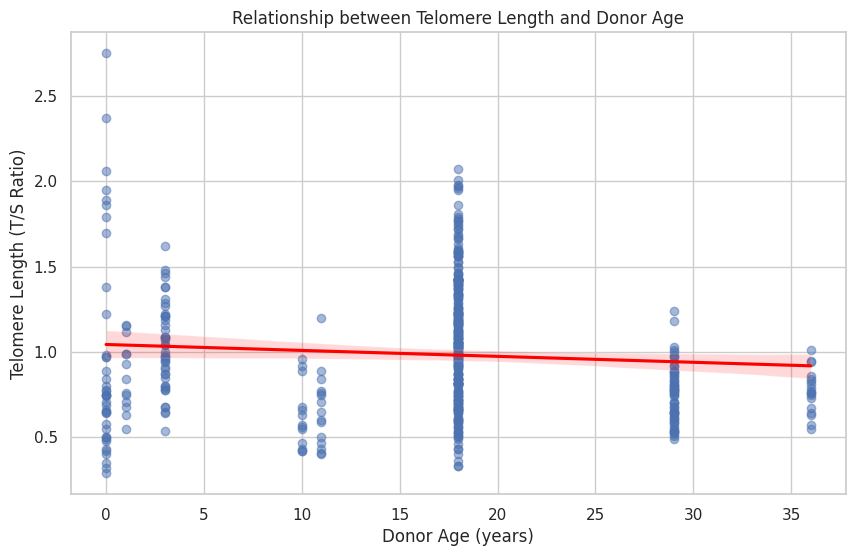

In [40]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Donor_age', y='Telomere_length_Uts_ratio', data=df_clean, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Add labels and title
plt.xlabel('Donor Age (years)')
plt.ylabel('Telomere Length (T/S Ratio)')
plt.title('Relationship between Telomere Length and Donor Age')

# Show the plot
plt.show()

In [41]:
# Perform Pearson correlation
correlation, p_value = stats.pearsonr(df_clean['Donor_age'], df_clean['Telomere_length_Uts_ratio'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['Donor_age'], df_clean['Telomere_length_Uts_ratio'])

print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"R-squared value: {r_value**2:.4f}")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

Pearson correlation coefficient: -0.0844
P-value: 6.1673e-02
R-squared value: 0.0071
Slope: -0.0035
Intercept: 1.0442


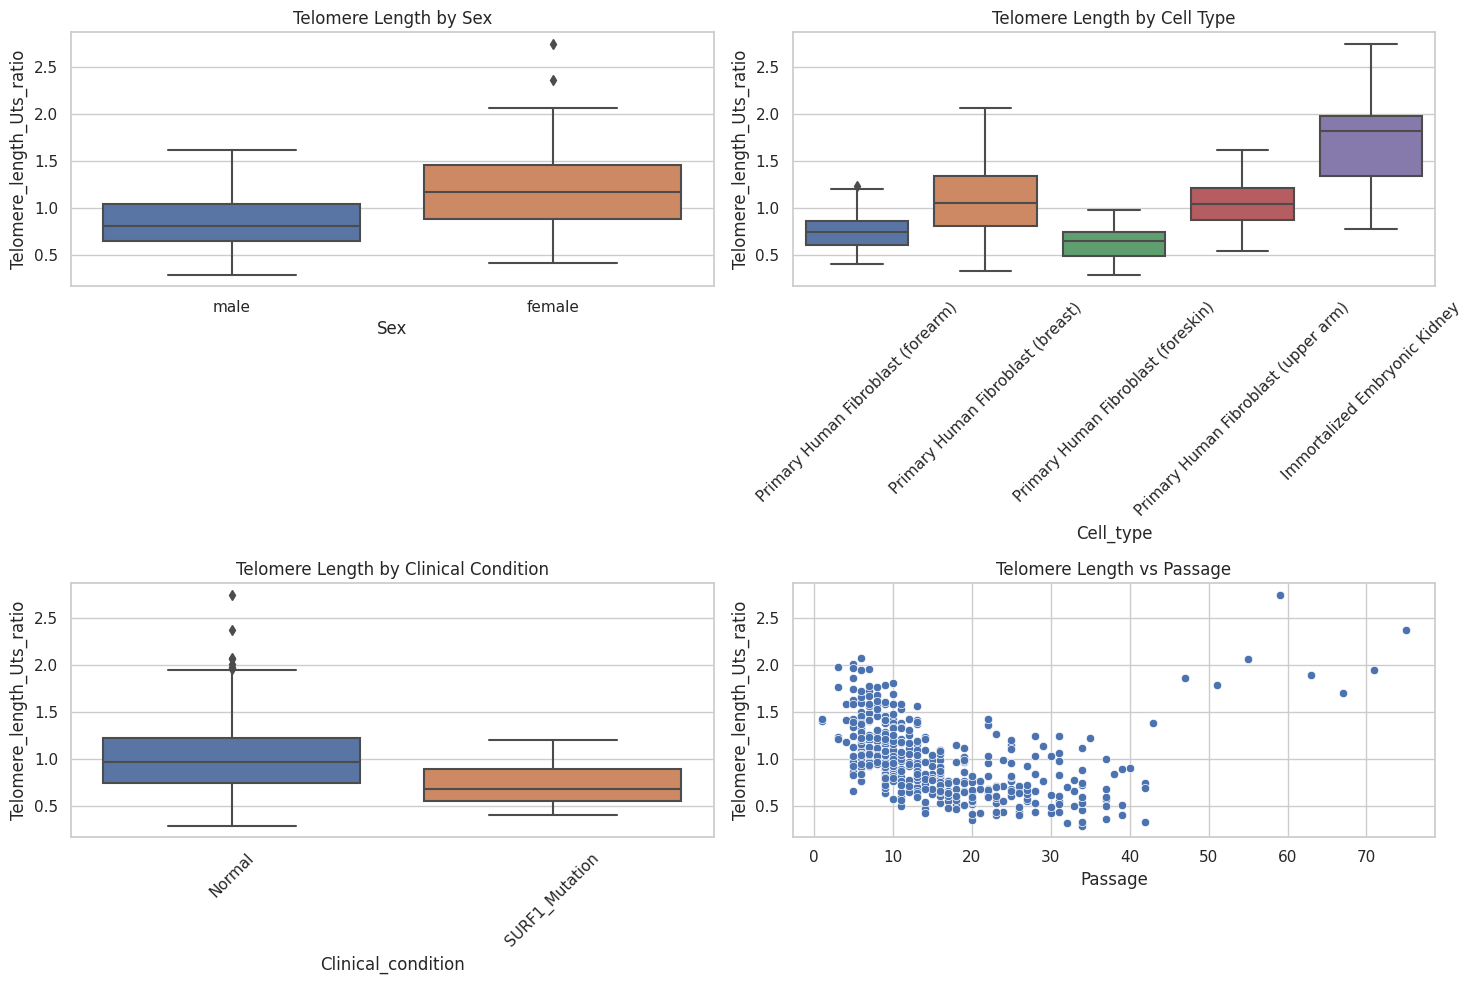

In [42]:
# Set up the plot
plt.figure(figsize=(15, 10))

# Telomere length by Sex
plt.subplot(2, 2, 1)
sns.boxplot(x='Sex', y='Telomere_length_Uts_ratio', data=df_clean)
plt.title('Telomere Length by Sex')

# Telomere length by Cell Type
plt.subplot(2, 2, 2)
sns.boxplot(x='Cell_type', y='Telomere_length_Uts_ratio', data=df_clean)
plt.title('Telomere Length by Cell Type')
plt.xticks(rotation=45)

# Telomere length by Clinical Condition
plt.subplot(2, 2, 3)
sns.boxplot(x='Clinical_condition', y='Telomere_length_Uts_ratio', data=df_clean)
plt.title('Telomere Length by Clinical Condition')
plt.xticks(rotation=45)

# Telomere length vs Passage
plt.subplot(2, 2, 4)
sns.scatterplot(x='Passage', y='Telomere_length_Uts_ratio', data=df_clean)
plt.title('Telomere Length vs Passage')

plt.tight_layout()
plt.show()


In [43]:
# Calculate mean telomere length for each group
print("Mean Telomere Length by Sex:")
df_clean.groupby('Sex')['Telomere_length_Uts_ratio'].mean()

Mean Telomere Length by Sex:


Sex
female    1.205968
male      0.854295
Name: Telomere_length_Uts_ratio, dtype: float64

In [44]:
print("\
Mean Telomere Length by Cell Type:")
print(df_clean.groupby('Cell_type')['Telomere_length_Uts_ratio'].mean())

Mean Telomere Length by Cell Type:
Cell_type
Immortalized Embryonic Kidney           1.720000
Primary Human Fibroblast (breast)       1.085280
Primary Human Fibroblast (forearm)      0.745333
Primary Human Fibroblast (foreskin)     0.629643
Primary Human Fibroblast (upper arm)    1.039333
Name: Telomere_length_Uts_ratio, dtype: float64


In [45]:
print("\
Mean Telomere Length by Clinical Condition:")
print(df_clean.groupby('Clinical_condition')['Telomere_length_Uts_ratio'].mean())

Mean Telomere Length by Clinical Condition:
Clinical_condition
Normal            1.012178
SURF1_Mutation    0.716829
Name: Telomere_length_Uts_ratio, dtype: float64


#### Summary:
* Sex: Females tend to have a higher mean telomere length compared to males.
* Cell Type: There is variation in telomere length across different cell types, with Immortalized Embryonic Kidney cells having the highest mean telomere length.
* Clinical Condition: Normal conditions show a higher mean telomere length compared to conditions with SURF1 Mutation.

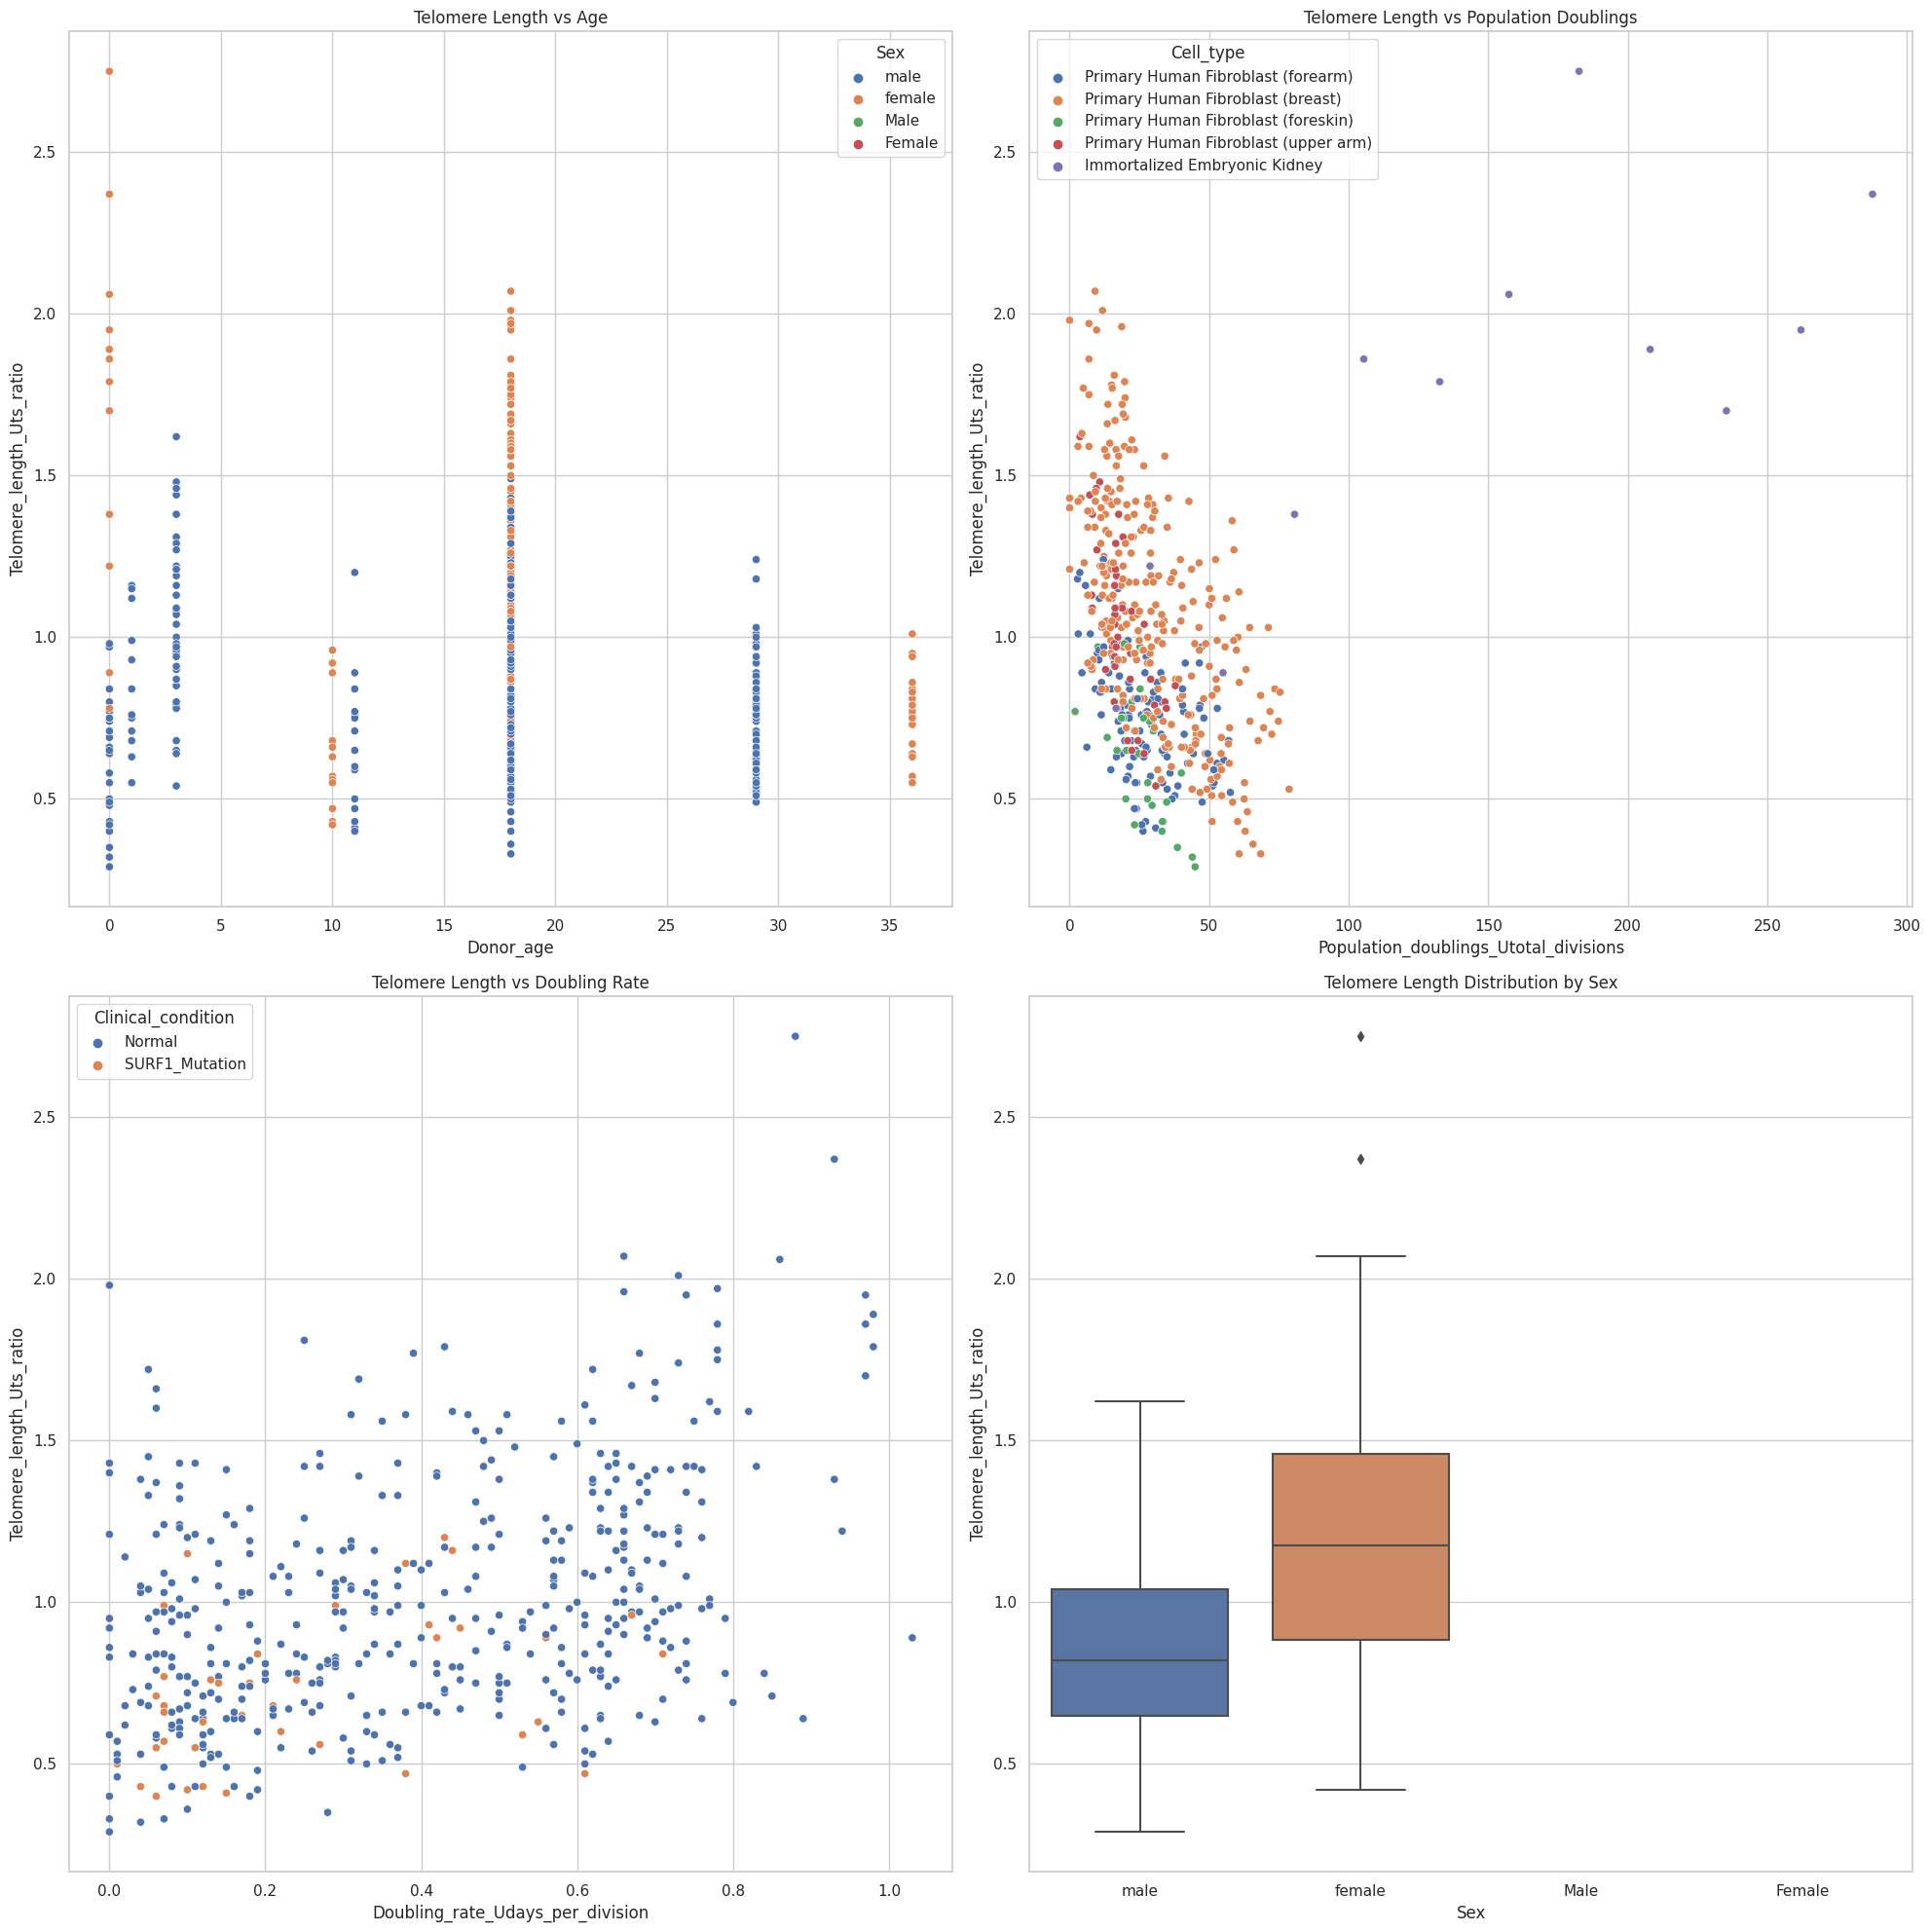

Correlations with Telomere Length:
Telomere_length_Uts_ratio                1.000000
Doubling_rate_Udays_per_division         0.416558
Population_doublings_Utotal_divisions    0.023105
Donor_age                               -0.084395
Name: Telomere_length_Uts_ratio, dtype: float64


In [46]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# 1. Telomere Length vs Age
sns.scatterplot(data=df, x='Donor_age', y='Telomere_length_Uts_ratio', hue='Sex', ax=axs[0, 0])
axs[0, 0].set_title('Telomere Length vs Age')

# 2. Telomere Length vs Population Doublings
sns.scatterplot(data=df, x='Population_doublings_Utotal_divisions', y='Telomere_length_Uts_ratio', hue='Cell_type', ax=axs[0, 1])
axs[0, 1].set_title('Telomere Length vs Population Doublings')

# 3. Telomere Length vs Doubling Rate
sns.scatterplot(data=df, x='Doubling_rate_Udays_per_division', y='Telomere_length_Uts_ratio', hue='Clinical_condition', ax=axs[1, 0])
axs[1, 0].set_title('Telomere Length vs Doubling Rate')

# 4. Telomere Length Distribution by Sex
sns.boxplot(data=df, x='Sex', y='Telomere_length_Uts_ratio', ax=axs[1, 1])
axs[1, 1].set_title('Telomere Length Distribution by Sex')

plt.tight_layout()
plt.show()

# Calculate correlations
correlations = df[['Telomere_length_Uts_ratio', 'Donor_age', 'Population_doublings_Utotal_divisions', 'Doubling_rate_Udays_per_division']].corr()['Telomere_length_Uts_ratio'].sort_values(ascending=False)

print("\
Correlations with Telomere Length:")
print(correlations)

In [47]:
# Separate data by sex
male_telomeres = df_clean[df_clean['Sex'] == 'male']['Telomere_length_Uts_ratio']
female_telomeres = df_clean[df_clean['Sex'] == 'female']['Telomere_length_Uts_ratio']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(male_telomeres, female_telomeres)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Calculate means for context
male_mean = np.mean(male_telomeres)
female_mean = np.mean(female_telomeres)

print(f"Mean telomere length for males: {male_mean}")
print(f"Mean telomere length for females: {female_mean}")

T-statistic: -11.393035102332181
P-value: 7.846591814851207e-27
Mean telomere length for males: 0.8542950819672132
Mean telomere length for females: 1.205967741935484


In [52]:
df_clean.columns

Index(['Sample', 'Cell_line_group', 'Unique_variable_name', 'Cell_line',
       'Cell_line_inhouse', 'Cell_type', 'Sex', 'Clinical_condition',
       'Donor_age', 'Study_part',
       ...
       'WGS_Percent_Coverage_at_1X', 'WGS_Percent_Coverage_at_10X',
       'WGS_Percent_Coverage_at_15X', 'WGS_Percent_callability',
       'WGS_Percent_autosome_callability',
       'WGS_Percent_autosome_exon_callability', 'WGS_Fragment_length_median',
       'WGS_Fragment_length_min', 'WGS_Fragment_length_max',
       'WGS_Fragment_length_SD'],
      dtype='object', length=233)

In [54]:
df_clean[['Donor_age','Sex']]

,Donor_age,Sex
1,29.0,male
3,29.0,male
6,29.0,male
10,29.0,male
13,29.0,male
...,...,...
1616,18.0,female
1617,18.0,female
1618,18.0,female
1619,18.0,female


In [68]:
print(f'number of ages in the dataset ')
df_clean['Donor_age'].unique()

number of ages in the dataset 


array([29., 36., 18.,  0.,  1., 11., 10.,  3.])

In [69]:
print(f'number of unique ages in the dataset ')
df_clean['Donor_age'].nunique()

number of unique ages in the dataset 


8

In [73]:
print(df_clean[['Sex','Donor_age']].dtypes)

Sex           object
Donor_age    float64
dtype: object


In [74]:
import pandas as pd

# Create dummy variables for 'Sex'
df_clean = pd.get_dummies(df_clean, columns=['Sex'], drop_first=True)

In [75]:
df_clean

,Sample,Cell_line_group,Unique_variable_name,Cell_line,Cell_line_inhouse,Cell_type,Clinical_condition,Donor_age,Study_part,Replicate_line,...,WGS_Percent_Coverage_at_10X,WGS_Percent_Coverage_at_15X,WGS_Percent_callability,WGS_Percent_autosome_callability,WGS_Percent_autosome_exon_callability,WGS_Fragment_length_median,WGS_Fragment_length_min,WGS_Fragment_length_max,WGS_Fragment_length_SD,Sex_male
1,2,HC5_sp1_Normal_Control_ox21,HC5_sp1_Normal_Control_ox21_p4,HC5,hFB1,Primary Human Fibroblast (forearm),Normal,29.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,HC5_sp1_Normal_Control_ox21,HC5_sp1_Normal_Control_ox21_p6,HC5,hFB1,Primary Human Fibroblast (forearm),Normal,29.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,7,HC5_sp1_Normal_Control_ox21,HC5_sp1_Normal_Control_ox21_p9,HC5,hFB1,Primary Human Fibroblast (forearm),Normal,29.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,11,HC5_sp1_Normal_Control_ox21,HC5_sp1_Normal_Control_ox21_p13,HC5,hFB1,Primary Human Fibroblast (forearm),Normal,29.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13,14,HC5_sp1_Normal_Control_ox21,HC5_sp1_Normal_Control_ox21_p16,HC5,hFB1,Primary Human Fibroblast (forearm),Normal,29.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1617,HC2_sp4_Normal_betahydroxybutyrate_ox21,HC2_sp4_Normal_betahydroxybutyrate_ox21_p7,HC2,hFB13,Primary Human Fibroblast (breast),Normal,18.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1617,1618,HC2_sp4_Normal_betahydroxybutyrate_ox21,HC2_sp4_Normal_betahydroxybutyrate_ox21_p8,HC2,hFB13,Primary Human Fibroblast (breast),Normal,18.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1618,1619,HC2_sp4_Normal_betahydroxybutyrate_ox21,HC2_sp4_Normal_betahydroxybutyrate_ox21_p9,HC2,hFB13,Primary Human Fibroblast (breast),Normal,18.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1619,1620,HC2_sp4_Normal_betahydroxybutyrate_ox21,HC2_sp4_Normal_betahydroxybutyrate_ox21_p10,HC2,hFB13,Primary Human Fibroblast (breast),Normal,18.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [76]:
import statsmodels.api as sm

# Add a constant term to the independent variables
X = df_clean[['Donor_age', 'Sex_male']]
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(df_clean['Telomere_length_Uts_ratio'], X).fit()
print(model.summary())


                                OLS Regression Results                               
Dep. Variable:     Telomere_length_Uts_ratio   R-squared:                       0.233
Model:                                   OLS   Adj. R-squared:                  0.230
Method:                        Least Squares   F-statistic:                     74.29
Date:                       Mon, 19 Aug 2024   Prob (F-statistic):           6.84e-29
Time:                               08:36:02   Log-Likelihood:                -146.55
No. Observations:                        491   AIC:                             299.1
Df Residuals:                            488   BIC:                             311.7
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------